<a href="https://colab.research.google.com/github/lilamil/amil1/blob/main/%D0%BB%D0%B0%D0%B1_6_(%D0%A8%D0%B0%D1%80%D0%B0%D1%84%D0%B5%D0%B5%D0%B2_%D0%90%D0%BC%D0%B8%D0%BB%D1%8C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## РАБОТА С БАЗАМИ ДАННЫХ SQLITE

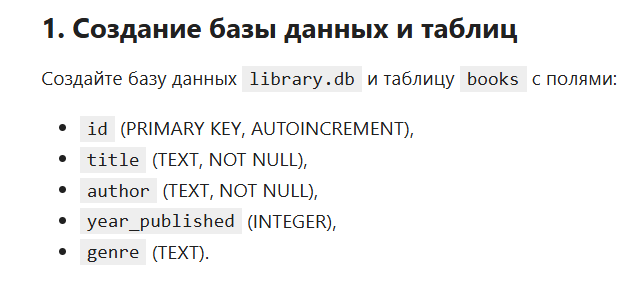

In [5]:
import sqlite3
connection = sqlite3.connect('library.db')
cursor = connection.cursor()
create_table_query = '''
CREATE TABLE IF NOT EXISTS books (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    title TEXT NOT NULL,
    author TEXT NOT NULL,
    year_published INTEGER NOT NULL,
    genre TEXT
);
'''
cursor.execute(create_table_query)
connection.commit()
connection.close()

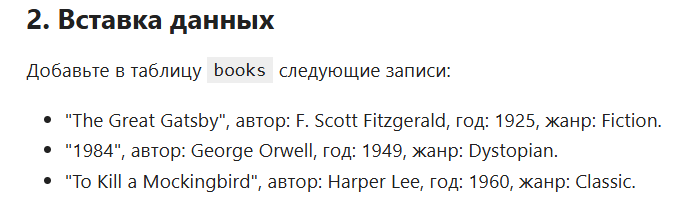

In [6]:
import sqlite3
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

insert_query = '''
INSERT INTO books (title, author, year_published, genre)
VALUES (?, ?, ?, ?);
'''

books_data = [
    ('The Great Gatsby', 'F. Scott Fitzgerald', 1925, 'Fiction'),
    ('1984', 'George Orwell', 1949, 'Dystopian'),
    ('To Kill a Mockingbird', 'Harper Lee', 1960, 'Classic')
]

cursor.executemany(insert_query, books_data)
connection.commit()

cursor.execute("SELECT * FROM books;")
print("Добавленные данные:")
for row in cursor.fetchall():
    print(row)

connection.close()

Добавленные данные:
(1, 'The Great Gatsby', 'F. Scott Fitzgerald', 1925, 'Fiction')
(2, '1984', 'George Orwell', 1949, 'Dystopian')
(3, 'To Kill a Mockingbird', 'Harper Lee', 1960, 'Classic')


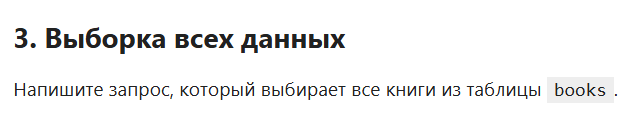

In [ ]:
import sqlite3
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

select_query = '''
SELECT * FROM books;
'''

cursor.execute(select_query)

rows = cursor.fetchall()
for row in rows:
    print(row)

connection.close()

(1, 'The Great Gatsby', 'F. Scott Fitzgerald', 1925, 'Fiction')
(2, '1984', 'George Orwell', 1949, 'Dystopian')
(3, 'To Kill a Mockingbird', 'Harper Lee', 1960, 'Classic')


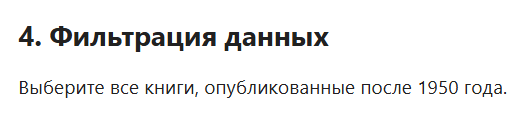

In [ ]:
import sqlite3
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

select_query = '''
SELECT * FROM books
WHERE year_published > ?;
'''

year_limit = 1950

cursor.execute(select_query,(year_limit,))

rows = cursor.fetchall()
for row in rows:
    print(row)

connection.close()

(3, 'To Kill a Mockingbird', 'Harper Lee', 1960, 'Classic')


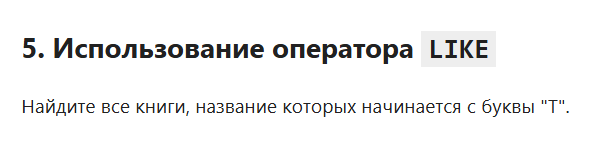

In [ ]:
import sqlite3
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

select_query = '''
SELECT * FROM books
WHERE title LIKE ?;
'''

search_pattern = "T%"

cursor.execute(select_query,(search_pattern,))

rows = cursor.fetchall()
for row in rows:
    print(row)

connection.close()

(1, 'The Great Gatsby', 'F. Scott Fitzgerald', 1925, 'Fiction')
(3, 'To Kill a Mockingbird', 'Harper Lee', 1960, 'Classic')


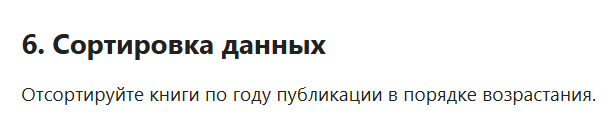

In [ ]:
import sqlite3
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

select_query = '''
SELECT * FROM books
ORDER BY year_published ASC;
'''

cursor.execute(select_query)

rows = cursor.fetchall()
for row in rows:
    print(row)

connection.close()

(1, 'The Great Gatsby', 'F. Scott Fitzgerald', 1925, 'Fiction')
(2, '1984', 'George Orwell', 1949, 'Dystopian')
(3, 'To Kill a Mockingbird', 'Harper Lee', 1960, 'Classic')


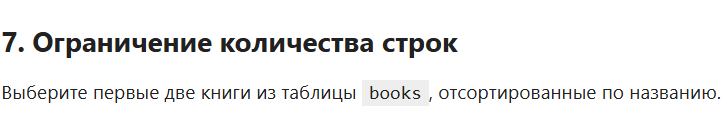

In [ ]:
import sqlite3
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

select_query = '''
SELECT * FROM books
ORDER BY title ASC LIMIT 2;
'''

cursor.execute(select_query)

rows = cursor.fetchall()
for row in rows:
    print(row)

connection.close()

(2, '1984', 'George Orwell', 1949, 'Dystopian')
(1, 'The Great Gatsby', 'F. Scott Fitzgerald', 1925, 'Fiction')


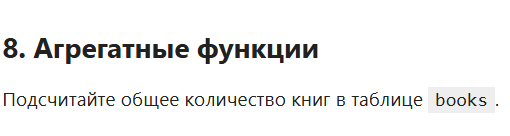

In [ ]:
import sqlite3
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

select_query = '''
SELECT COUNT(*) FROM books;
'''

cursor.execute(select_query)

result = cursor.fetchone()
print(result[0])

connection.close()

3


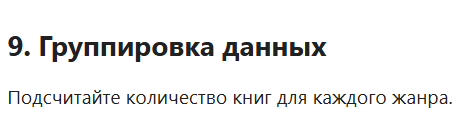

In [ ]:
import sqlite3
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

select_query = '''
SELECT genre, COUNT(*) AS count FROM books GROUP by genre;
'''

cursor.execute(select_query)

rows = cursor.fetchall()
for row in rows:
    print(f"Жанр: {row[0]}, Количество: {row[1]}")

connection.close()

Жанр: Classic, Количество: 1
Жанр: Dystopian, Количество: 1
Жанр: Fiction, Количество: 1


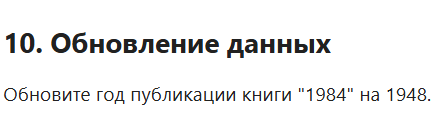

In [ ]:
import sqlite3
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

update_query = '''
UPDATE books
SET year_published = ?
WHERE title = ?
'''

new_year = 1948
book_title = '1984'

cursor.execute(update_query,(new_year, book_title))
connection.commit()

select_query = '''
SELECT * FROM books
'''
cursor.execute(select_query)
rows = cursor.fetchall()
for row in rows:
    print(row)

connection.close()

(1, 'The Great Gatsby', 'F. Scott Fitzgerald', 1925, 'Fiction')
(2, '1984', 'George Orwell', 1948, 'Dystopian')
(3, 'To Kill a Mockingbird', 'Harper Lee', 1960, 'Classic')


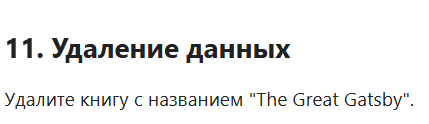

In [ ]:
import sqlite3
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

delete_query = '''
DELETE FROM books
WHERE title = ?
'''

book_title = 'The Great Gatsby'

cursor.execute(delete_query,(book_title,))
connection.commit()

select_query = '''
SELECT * FROM books
'''
cursor.execute(select_query)
rows = cursor.fetchall()
for row in rows:
    print(row)

connection.close()

(2, '1984', 'George Orwell', 1949, 'Dystopian')
(3, 'To Kill a Mockingbird', 'Harper Lee', 1960, 'Classic')


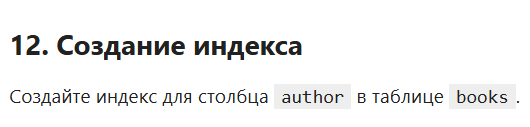

In [ ]:
import sqlite3
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

create_index_query = '''
CREATE INDEX IF NOT EXISTS idx_books_author
ON books (author)
'''

cursor.execute(create_index_query)
connection.commit()

select_query = '''
SELECT * FROM books
'''
cursor.execute(select_query)
rows = cursor.fetchall()
for row in rows:
    print(row)

connection.close()

(2, '1984', 'George Orwell', 1948, 'Dystopian')
(3, 'To Kill a Mockingbird', 'Harper Lee', 1960, 'Classic')


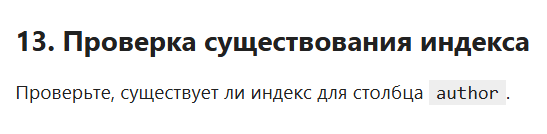

In [ ]:
import sqlite3
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

cursor.execute('''
SELECT name FROM sqlite_master WHERE type='index' AND name='idx_books_author';
''')

result = cursor.fetchone()
if result:
    print(f"Индекс '{result[0]}' существует.")
else:
    print("Индекс не существует.")


connection.close()

Индекс 'idx_books_author' существует.


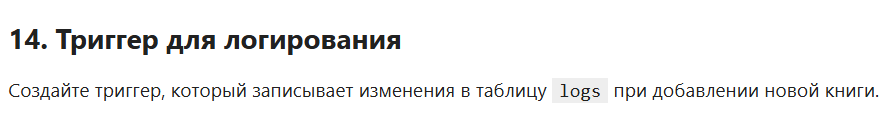

In [ ]:
import sqlite3
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

cursor.execute('''
CREATE TABLE IF NOT EXISTS book_logs (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    book_id INTEGER,
    action TEXT,
    timestamp DATETIME DEFAULT CURRENT_TIMESTAMP
);
''')

create_trigger_query = '''
CREATE TRIGGER IF NOT EXISTS log_book_changes
AFTER INSERT ON books
FOR EACH ROW
BEGIN
    INSERT INTO book_logs (book_id, action)
    VALUES (NEW.id, 'INSERT');
END;
'''
cursor.execute(create_trigger_query)
connection.commit()

insert_query = '''
INSERT INTO books (title, author, year_published, genre)
VALUES (?, ?, ?, ?);
'''

books_data = [
    ('The Sea-Wolf', 'Jack London', 1904, 'Adventure')
]

cursor.executemany(insert_query, books_data)
connection.commit()

select_logs_query = '''
SELECT * FROM book_logs;
'''

cursor.execute(select_logs_query)
logs = cursor.fetchall()

print("Логи изменений:")
for log in logs:
    print(log)

connection.close()

Логи изменений:
(1, 4, 'INSERT', '2025-04-27 14:09:54')


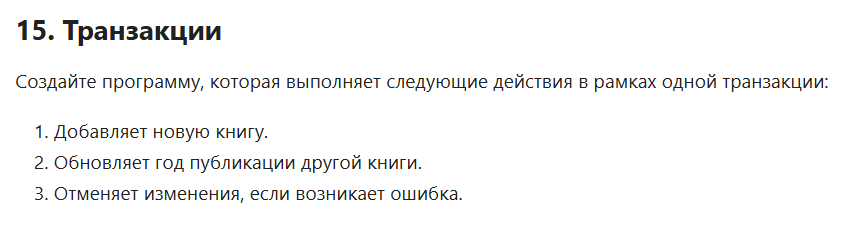

In [ ]:
import sqlite3
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

try:
    cursor.execute('BEGIN TRANSACTION')

    cursor.execute('''
    INSERT INTO books (title, author, year_published, genre)
    VALUES (?, ?, ?, ?);
    ''', ('The Three Musketeers', 'Alexandre Dumas', 1844, 'Adventure'))

    cursor.execute('''
    UPDATE books
    SET year_published = ?
    WHERE title = ?;
    ''', (1905,'The Sea-Wolf'))

    connection.commit()
    print("Транзакция успешно завершена.")
    select_query = '''
    SELECT * FROM books
    '''
    cursor.execute(select_query)
    rows = cursor.fetchall()
    for row in rows:
      print(row)

except Exception as e:
    connection.rollback()
    print(f"Ошибка: {e}. Изменения отменены.")
finally:
    connection.close()

Транзакция успешно завершена.
(2, '1984', 'George Orwell', 1949, 'Dystopian')
(3, 'To Kill a Mockingbird', 'Harper Lee', 1960, 'Classic')
(4, 'The Sea-Wolf', 'Jack London', 1905, 'Adventure')
(5, 'The Three Musketeers', 'Alexandre Dumas', 1844, 'Adventure')


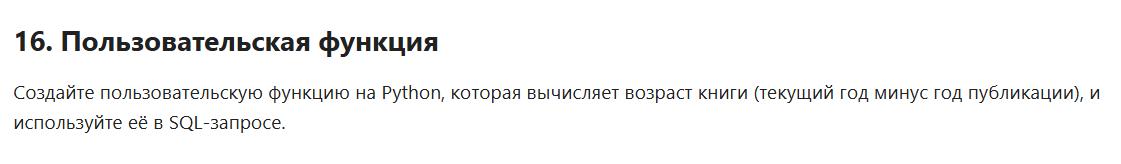

In [ ]:
import sqlite3

def calculate_age(year_published):
    from datetime import datetime
    current_year = datetime.now().year
    return current_year - year_published

connection = sqlite3.connect('library.db')
cursor = connection.cursor()

connection.create_function("calculate_age", 1, calculate_age)

cursor.execute('''
SELECT title, calculate_age(year_published) AS book_age FROM books;
''')

rows = cursor.fetchall()
for row in rows:
    print(row)

connection.close()

('1984', 76)
('To Kill a Mockingbird', 65)
('The Sea-Wolf', 120)
('The Three Musketeers', 181)


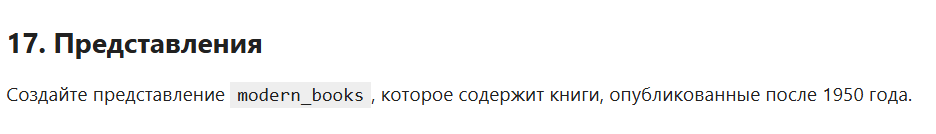

In [ ]:
import sqlite3
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

cursor.execute('''
CREATE VIEW IF NOT EXISTS modern_books AS
SELECT * FROM books WHERE year_published > 1950;
''')

cursor.execute('SELECT * FROM modern_books;')

rows = cursor.fetchall()
for row in rows:
    print(row)

connection.close()

(3, 'To Kill a Mockingbird', 'Harper Lee', 1960, 'Classic')


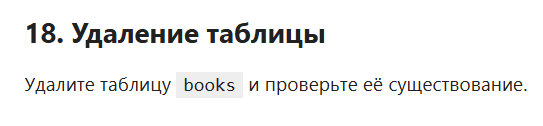

In [4]:
import sqlite3
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

cursor.execute('''
SELECT name FROM sqlite_master WHERE type='table' AND name='books';
''')

result = cursor.fetchone()

if result:
    print("Таблица 'books' существует. Удаляем...")
    cursor.execute('DROP TABLE books')
else:
    print("Таблица 'books' не существует.")

connection.commit()
connection.close()

Таблица 'books' существует. Удаляем...


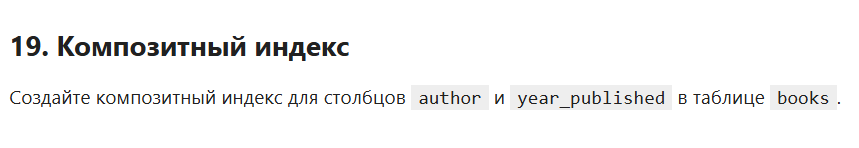

In [7]:
import sqlite3
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

create_composite_index_query = '''
CREATE INDEX IF NOT EXISTS idx_books_title_year
ON books (title, year_published);
'''
cursor.execute(create_composite_index_query)

cursor.execute('''
SELECT name FROM sqlite_master WHERE type='index' AND name='idx_books_title_year';
''')
result = cursor.fetchone()
if result:
    print(f"Индекс '{result[0]}' существует.")
else:
    print("Индекс не существует.")


connection.commit()
connection.close()

Индекс 'idx_books_title_year' существует.


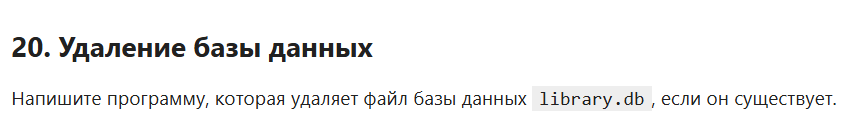

In [8]:
import os

db_file = 'library.db'

if os.path.exists(db_file):
    print(f"Удаляем базу данных '{db_file}'...")
    os.remove(db_file)
else:
    print(f"База данных '{db_file}' не существует.")

Удаляем базу данных 'library.db'...
